In [15]:
##############################################################################################################
# make_moea_output_plots.py - python script to create plots for multi-objective optimization outputs
# Project started March 2018, last update May 2020
##############################################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sbn
import importlib
from datetime import datetime

### Project functions ###
import functions_moea_output_plots


sbn.set_style('white')
sbn.set_context('paper', font_scale=1.55)

eps = 1e-13
startTime = datetime.now()

dir_generated_inputs = './../../data/generated_inputs/'
dir_moea_output = './../../data/optimization_output/'
dir_figs = './../../figures/'

# get runtime metrics for moea runs with different number of RBFs (nrbfs)
print('Getting runtime metrics for moea runs with different number of RBFs..., ',
      datetime.now() - startTime)
importlib.reload(functions_moea_output_plots)
metrics = {}
nrbfs = (1, 2, 3, 4, 8, 12)
for nrbf in nrbfs:
    metrics[str(nrbf)+'rbf'] = []
    for s in range(1, 11):
        metrics[str(nrbf)+'rbf'].append(functions_moea_output_plots.getMetrics(dir_moea_output + '4obj_' + str(nrbf) +
                                                                              'rbf/metrics/DPS_param150_seedS1_seedB' + str(s) + '.metrics',
                                                                              '../../data/optimization_output/4obj_rbf_overall/DPS_4obj_rbf_overall_borg.hypervolume'))


Getting runtime metrics for moea runs with different number of RBFs...,  0:00:00.000118


In [29]:
metrics['1rbf'][0]['Hypervolume']

0     0.725138
1     0.766767
2     0.804575
3     0.816193
4     0.824316
        ...   
95    0.976118
96    0.976135
97    0.977159
98    0.977216
99    0.978055
Name: Hypervolume, Length: 100, dtype: float64

Plotting hypervolume (fig S1)...,  0:30:25.751330


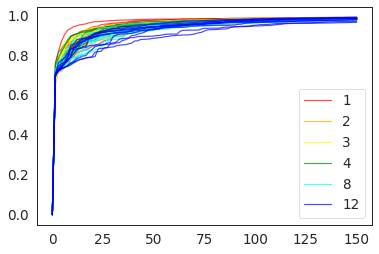

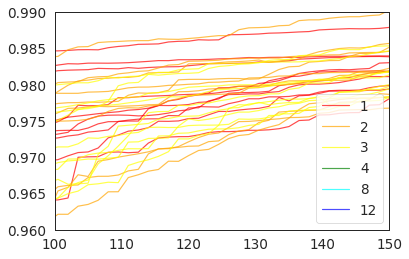

In [38]:
# ### plot hypervolume for baseline (50 seeds) + sample of 12 sensitivity analysis runs (10 seeds) (fig S4)
print('Plotting hypervolume (fig S1)..., ', datetime.now() - startTime)
importlib.reload(functions_moea_output_plots)
nfe = 150000
fe_prints = 100
fe_grid = np.arange(0, nfe+1, nfe/fe_prints)
nseed = 10
functions_moea_output_plots.plot_metrics(dir_figs, metrics, nrbfs, nseed, fe_grid)